In [182]:
import numpy as np
import math

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [183]:
full_data = pd.read_csv("../visual/full_data_Pop.csv")
train, test = train_test_split(full_data, test_size=0.2)

In [184]:
train.head()

,Unnamed: 0,artist_name,track_uri,artist_uri,name,album_uri,duration_ms,album_name,acousticness,danceability,...,valence,track_popularity,id,popularity,explicit,id_artists,release_date,key,mode,time_signature
6794,6794,Boards of Canada,spotify:track:5B5nloaA2UpNrjweosqVe3,spotify:artist:2VAvhf61GgLYmC6C8anyX1,Telephasic Workshop,spotify:album:1vWnB0hYmluskQuzxwo25a,395480,Music Has The Right To Children,0.0175,0.683,...,0.576,0.0,5B5nloaA2UpNrjweosqVe3,42,0,['2VAvhf61GgLYmC6C8anyX1'],1998-04-20,2,1,4
4022,4022,Toni Braxton,spotify:track:6kD36kVRn5leDDbjXpHQY0,spotify:artist:3X458ddYA2YcVWuVIGGOYe,Just Be A Man About It,spotify:album:0UZsKcXzOehMvFWTiBlwMi,288933,The Heat,0.2740,0.753,...,0.560,13.0,6kD36kVRn5leDDbjXpHQY0,51,0,['3X458ddYA2YcVWuVIGGOYe'],2000,9,1,4
3381,3381,Trey Songz,spotify:track:5rX60GiR64Epgri9Ubjzg9,spotify:artist:2iojnBLj0qIMiKPvVhLnsH,Love Faces,spotify:album:5Qex4ioxOJfHrnsWbt8Zlj,243800,"Passion, Pain & Pleasure",0.0599,0.654,...,0.333,42.0,1lUQPlbxDG7x8O8rwbxTRt,58,0,['2iojnBLj0qIMiKPvVhLnsH'],2010-09-14,11,1,4
2877,2877,Marina and the Diamonds,spotify:track:3MNeq4nPxnPK1lsGGXZeRU,spotify:artist:6CwfuxIqcltXDGjfZsMd9A,Girls,spotify:album:1CtDa7pVfLF4u2ZadRTWz7,208760,The Family Jewels,0.0272,0.661,...,0.934,0.0,3MNeq4nPxnPK1lsGGXZeRU,47,0,['6CwfuxIqcltXDGjfZsMd9A'],2010-02-15,9,0,4
3657,3657,Drake,spotify:track:7t1lBIr3WIEtqQEOdZFMUf,spotify:artist:3TVXtAsR1Inumwj472S9r4,Look What You've Done,spotify:album:6X1x82kppWZmDzlXXK3y3q,301960,Take Care,0.4850,0.495,...,0.271,0.0,7t1lBIr3WIEtqQEOdZFMUf,60,1,['3TVXtAsR1Inumwj472S9r4'],2011-11-15,3,0,4


In [185]:
train.dtypes

Unnamed: 0            int64
artist_name          object
track_uri            object
artist_uri           object
name                 object
album_uri            object
duration_ms           int64
album_name           object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
track_popularity    float64
id                   object
popularity            int64
explicit              int64
id_artists           object
release_date         object
key                   int64
mode                  int64
time_signature        int64
dtype: object

In [186]:
def fix_year(data):
    data['release_date'] = pd.to_datetime(data['release_date']) # convert 'dates' column to datetime dtype
    data['year'] = data['release_date'].dt.year # extract year value into new 'year' column
    return data

In [187]:

def process_data_fm(data):

    data = fix_year(data)

    data = (
        data.pipe(select_columns,'popularity','duration_ms','explicit','year'
                  ,'danceability','energy','instrumentalness'
                  ,'liveness','loudness','speechiness','tempo','valence'
                  )
    )
    data.columns.values
    x = data.drop(['popularity'], axis=1)
    y = data['popularity']
    return x,y

In [188]:
def select_columns(data, *columns):
    return data.reindex(columns = columns)

In [189]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    MSE = np.square(np.subtract(actual,predicted)).mean()
    rmse = math.sqrt(MSE)
    return rmse

In [190]:
X_train, y_train = process_data_fm(train)
X_test, y_test = process_data_fm(test)

In [191]:
alphas = np.arange(0.1, 200.1, .1)
final_model = lm.LassoCV(alphas=alphas, cv=5)

# Fit and predict
final_model.fit(X_train, y_train)
y_predicted = final_model.predict(X_test)

print(f'The validation RMSE for this model with '
      f'alpha={round(float(final_model.alpha_), 2)} is '
      f'{round(rmse(y_test, y_predicted), 2)}.')

The validation RMSE for this model with alpha=0.1 is 10.88.


Text(0, 0.5, 'RMSE')

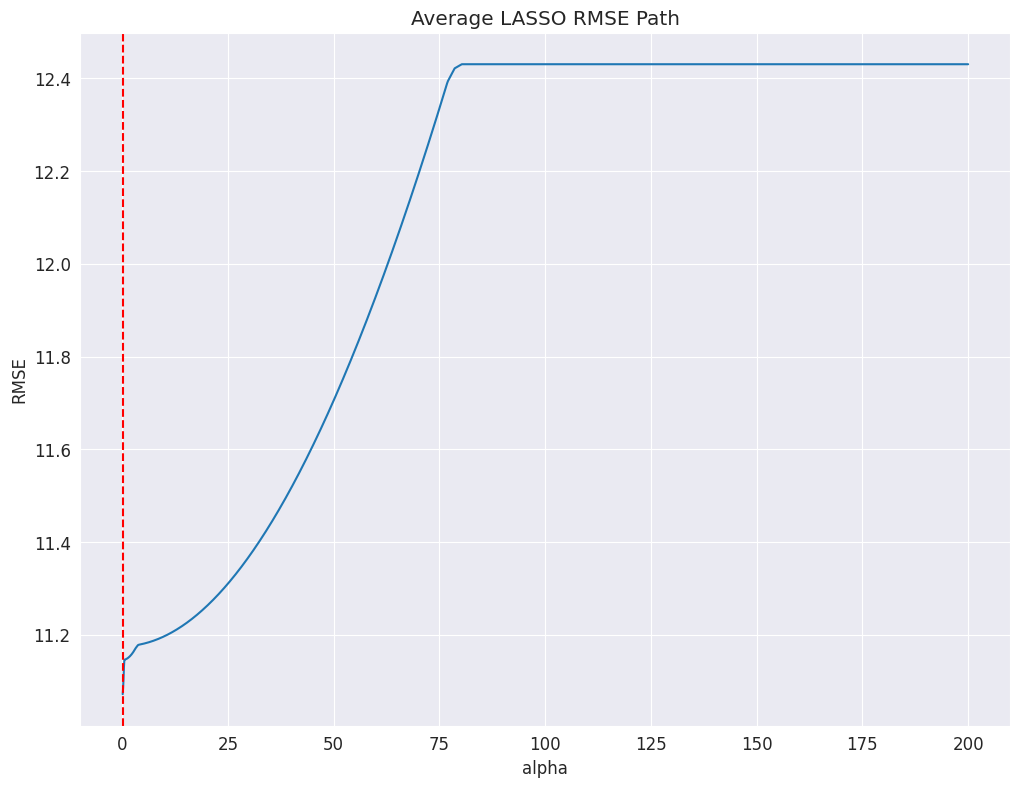

In [192]:
optimal_alpha = round(float(final_model.alpha_), 2)
plt.plot(final_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, final_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')

The validation RMSE for this model with alpha=0.1 is 25.02.


Text(0, 0.5, 'RMSE')

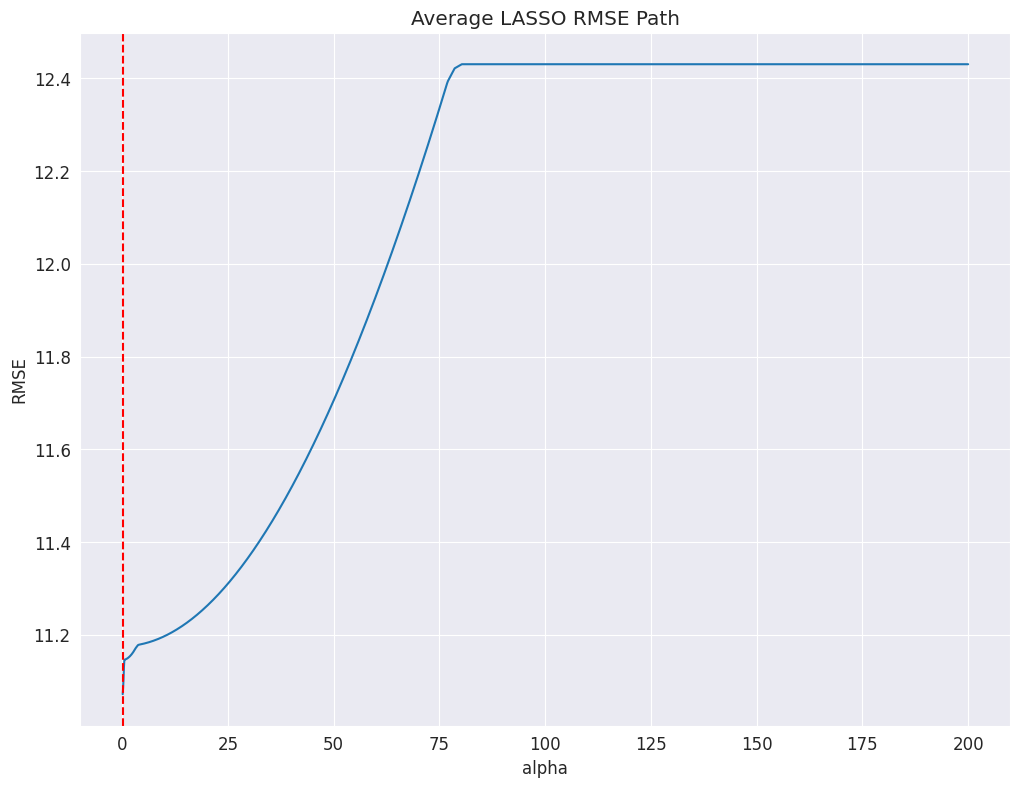

In [200]:
data_good = pd.read_csv("tracks.csv")
# train_good, test_good = train_test_split(data_good, test_size=0.2)

X_test_good, y_test_good = process_data_fm(data_good)

# predict popularity with other data in model
good_data_predict = final_model.predict(X_test_good)


print(f'The validation RMSE for this model with '
      f'alpha={round(float(final_model.alpha_), 2)} is '
      f'{round(rmse(y_test_good, good_data_predict), 2)}.')
optimal_alpha = round(float(final_model.alpha_), 2)
plt.plot(final_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, final_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')


The validation RMSE for this model with alpha=0.1 is 21.44.


Text(0.5, 0, 'alpha')

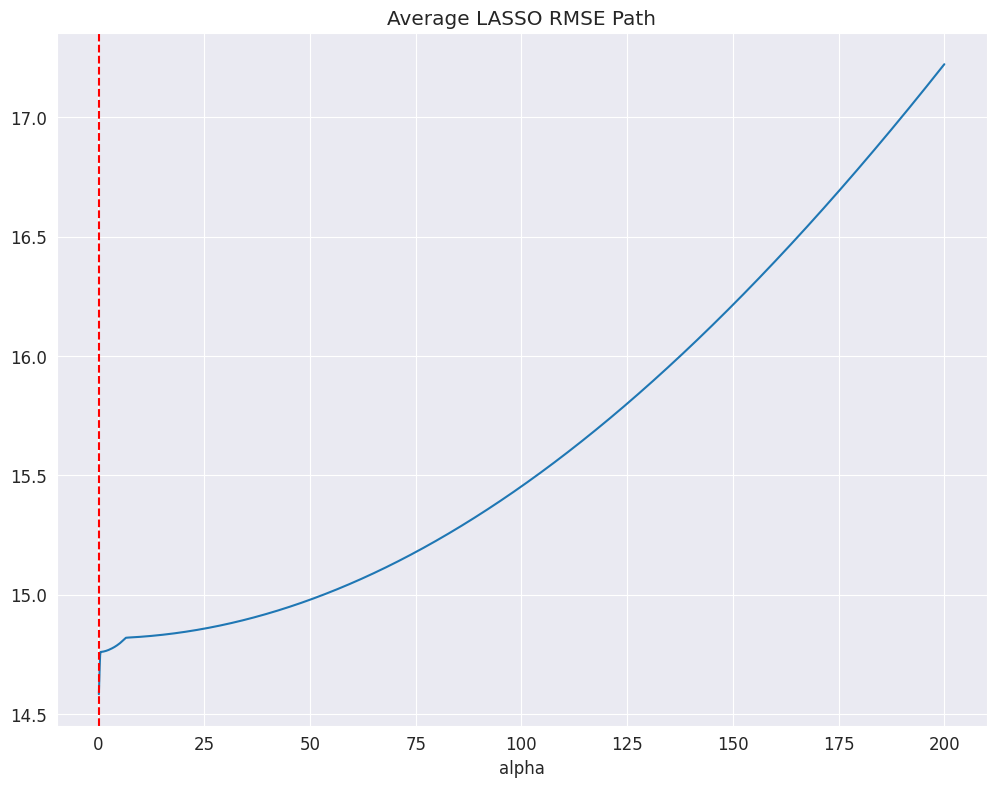

In [194]:
data_good = pd.read_csv("tracks.csv")
train_good, test_good = train_test_split(data_good, test_size=0.2)
train_good.head()
train_good.dtypes


def fix_year(data):
    data['release_date'] = pd.to_datetime(data['release_date'])  # convert 'dates' column to datetime dtype
    data['year'] = data['release_date'].dt.year  # extract year value into new 'year' column
    return data


def process_data_fm(data):
    data = fix_year(data)

    data = (
        data.pipe(select_columns, 'popularity', 'duration_ms', 'explicit', 'year'
                  , 'danceability', 'energy', 'instrumentalness'
                  , 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
                  )
    )
    data.columns.values
    x = data.drop(['popularity'], axis=1)
    y = data['popularity']
    return x, y


def select_columns(data, *columns):
    return data.reindex(columns=columns)


def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    MSE = np.square(np.subtract(actual, predicted)).mean()
    rmse = math.sqrt(MSE)
    return rmse


X_train_good, y_train_good = process_data_fm(train_good)
X_test_good, y_test_good = process_data_fm(test_good)
alphas = np.arange(0.1, 200.1, .1)
good_model = lm.LassoCV(alphas=alphas, cv=5)

# Fit and predict
good_model.fit(X_train_good, y_train_good)
y_predicted_good = good_model.predict(X_test)

print(f'The validation RMSE for this model with '
      f'alpha={round(float(good_model.alpha_), 2)} is '
      f'{round(rmse(y_test_good, y_predicted_good), 2)}.')
optimal_alpha = round(float(good_model.alpha_), 2)
plt.plot(good_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, good_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
